In [85]:
import os 
import tqdm
import math
import random
import operator
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

dir_ = '../data/'
file_name = 'normalized_to_rating_filter_track_5_user_100.csv'

In [86]:
train = pd.read_pickle(os.path.join(dir_, 'train_' + file_name[:-3] + 'pkl'))

In [87]:
num_user = len(train['uid'].unique())
print(num_user)

220


In [88]:
# Setup the number of customers in the beginning
user_status = []
for i in range(num_user):
    user_status.append(False)

customers = []

customer_init = int(random.random()*10//1 + 5) # 5-15
print('Initial customer : ', customer_init)
while customer_init > 0:
    group_size = int(random.random()*5//1 + 1)
    if group_size > customer_init:
        group_size = customer_init # Constrain the value
                
    customer = []
    
    for i in range(group_size):
        u = int(random.random()*num_user//1)
        if user_status[u] == False:
            user_status[u] = True
        else:
            while user_status[u]:
                u = int(random.random()*num_user//1)
            user_status[u] = True
        customer.append(u)
        
    customers.append(customer)
    customer_init -= group_size
    
print(customers)

Initial customer :  11
[[97, 65, 154], [58, 2], [80, 28, 148, 212], [102, 176]]


In [89]:
# Setup the arrival time of the initial customers
arrivals = []
for i in range(len(customers)):
    arrivals.append(0)
arrivals

[0, 0, 0, 0]

In [90]:
time_sim = 0
time_to_sim = 120

while time_sim < time_to_sim:
    
    inter_arrival = int(np.random.exponential(5))
    arrival = time_sim + inter_arrival
    
    if arrival < time_to_sim:
        customer = []        
        group_size = int(random.random()*5//1 + 1)

        for i in range(group_size):
            u = int(random.random()*num_user//1)
            if user_status[u] == False:
                user_status[u] = True
            else:
                while user_status[u]:
                    u = int(random.random()*num_user//1)
                user_status[u] = True
            customer.append(u)

        customers.append(customer)
        arrivals.append(arrival)
        
    time_sim += inter_arrival

In [91]:
departures = []
for i in range(len(customers)):
    service_time = int(np.random.exponential(20))
    if service_time < 5:
        service_time = 5
    departure = arrivals[i] + service_time
    departures.append(departure)

In [92]:
pd_sim = pd.DataFrame(columns=['gid','arrival','departure', 'sevice', 'members'])

for i in range(len(customers)):
    pd_sim = pd_sim.append({'gid': i, 'arrival': arrivals[i], 'departure': departures[i],'sevice': (departures[i]-arrivals[i]), 'members': customers[i]}, ignore_index=True)
    
pd_sim

,gid,arrival,departure,sevice,members
0,0,0,48,48,"[97, 65, 154]"
1,1,0,27,27,"[58, 2]"
2,2,0,5,5,"[80, 28, 148, 212]"
3,3,0,22,22,"[102, 176]"
4,4,3,8,5,"[133, 49, 96, 185]"
5,5,4,23,19,"[130, 190, 215, 66, 73]"
6,6,9,33,24,"[10, 146]"
7,7,13,25,12,"[219, 134]"
8,8,13,33,20,"[184, 203]"
9,9,23,28,5,[87]


In [93]:
pd_sim.to_pickle('simulation.pkl')

In [94]:
pd_sim = pd.read_pickle('simulation.pkl')
pd_sim

,gid,arrival,departure,sevice,members
0,0,0,48,48,"[97, 65, 154]"
1,1,0,27,27,"[58, 2]"
2,2,0,5,5,"[80, 28, 148, 212]"
3,3,0,22,22,"[102, 176]"
4,4,3,8,5,"[133, 49, 96, 185]"
5,5,4,23,19,"[130, 190, 215, 66, 73]"
6,6,9,33,24,"[10, 146]"
7,7,13,25,12,"[219, 134]"
8,8,13,33,20,"[184, 203]"
9,9,23,28,5,[87]


In [95]:
predictions_user = pd.read_pickle(os.path.join(dir_, 'prediction_cf_user_top_N_' + file_name[:-3] + 'pkl'))
predictions_SVD_user = pd.read_pickle(os.path.join(dir_, 'prediction_SVD_user_top_N_' + file_name[:-3] + 'pkl'))
prediction_SVD = pd.read_pickle(os.path.join(dir_, 'prediction_svd_top_N_' + file_name[:-3] + 'pkl'))
prediction_popularity = pd.read_pickle(os.path.join(dir_, 'prediction_popularity_count_top_N_normalized_popularity_filter_track_5_user_100.pkl'))

In [96]:
test = pd.read_pickle(os.path.join(dir_, 'test_' + file_name[:-3] + 'pkl'))

In [97]:
test

,uid,tid,rating
481832,90,5374,0.25
1247457,214,35528,1.25
968433,172,29367,4.25
25524,4,11632,4.25
60178,8,19012,0.25
...,...,...,...
587045,115,27784,3.25
309534,65,12495,0.25
660480,130,20821,0.25
373255,73,27444,2.75


In [98]:
n = 10000
Top_N_List =  pd.DataFrame() 
for _, group in pd_sim.iterrows():
    if len(group['members']) == 1:
        m = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
    elif len(group['members']) == 2:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = m[['tid', 'rating_u1','rating_u2']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'])/2
    elif len(group['members']) == 3:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        u3 = prediction_SVD[prediction_SVD['uid'] == group['members'][2]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = pd.merge(m,  u3, on=['tid'], how='inner')
        m = m[['tid', 'rating_u1','rating_u2','rating']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'] + m['rating'])/3
    elif len(group['members']) == 4:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        u3 = prediction_SVD[prediction_SVD['uid'] == group['members'][2]]
        u4 = prediction_SVD[prediction_SVD['uid'] == group['members'][3]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = pd.merge(m,  u3, on=['tid'], how='inner', suffixes=['','_u3'])
        m = pd.merge(m,  u4, on=['tid'], how='inner', suffixes=['_u3','_u4'])
        m = m[['tid', 'rating_u1','rating_u2','rating_u3','rating_u4']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'] + m['rating_u3'] + m['rating_u4'])/4
    elif len(group['members']) == 5:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        u3 = prediction_SVD[prediction_SVD['uid'] == group['members'][2]]
        u4 = prediction_SVD[prediction_SVD['uid'] == group['members'][3]]
        u5 = prediction_SVD[prediction_SVD['uid'] == group['members'][4]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = pd.merge(m,  u3, on=['tid'], how='inner', suffixes=['','_u3'])
        m = pd.merge(m,  u4, on=['tid'], how='inner', suffixes=['','_u4'])
        m = pd.merge(m,  u5, on=['tid'], how='inner', suffixes=['_u3','_u5'])
        m = m[['tid', 'rating_u1','rating_u2','rating_u3','rating_u4','rating_u5']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'] + m['rating_u3'] + m['rating_u4'] + m['rating_u5'])/5 
    else:
        print('Error')
    m = m[['tid', 'rating']]
    m = m.sort_values(by=['rating'],  ascending=False)
    m = m[:n]   
    m['gid'] = group['gid']
    Top_N_List = Top_N_List.append(m)

In [99]:
Top_N_List['listened'] = False
Top_N_List['count'] = 1
Top_N_List

,tid,rating,gid,listened,count
6106,6430.0,2.632502,0,False,1
6100,6424.0,2.620765,0,False,1
7842,8217.0,2.601381,0,False,1
1681,1828.0,2.572285,0,False,1
9784,10234.0,2.566974,0,False,1
...,...,...,...,...,...
11425196,9213.0,2.454211,36,False,1
11459543,44268.0,2.454197,36,False,1
11446540,30991.0,2.454183,36,False,1
11444736,29161.0,2.454171,36,False,1


In [100]:
playlist = []
for i in range(int(time_to_sim/5)):
    groups = pd_sim[pd_sim['arrival']<=i*5]
    groups = groups[groups['departure']>i*5]
    rating_table = pd.DataFrame() 
    for _, j in groups.iterrows():
        if len(rating_table) == 0:
            rating_table = Top_N_List[Top_N_List['gid'] == j['gid']].copy()
        else:
            r_t = Top_N_List[Top_N_List['gid'] == j['gid']].copy()
            rating_table = rating_table.set_index('tid').add(r_t.set_index('tid'), fill_value=0).reset_index()
        rating_table = rating_table.sort_values(by=['rating'],  ascending=False)
            
    tid = rating_table.iloc[0]['tid']
    k = 0
    while rating_table.iloc[k]['listened'] and rating_table.iloc[k]['count'] < len(groups): #避免重複推薦
        k += 1
        tid = rating_table.iloc[k]['tid']
    playlist.append(tid)
    
    for _, j in groups.iterrows(): #避免重複推薦(紀錄已經被推薦過的歌曲)
        gid = j['gid']
        Top_N_List.loc[operator.and_((Top_N_List['tid']==tid), (Top_N_List['gid']==gid)), ['listened']] = True

In [101]:
playlist_pop = []
pop_list = np.zeros(24)
prediction_popularity = prediction_popularity.sort_values(by=['count'],  ascending=False)
pop = prediction_popularity[:24].reset_index().copy()
for i in range(int(time_to_sim/5)):
    t = int(random.random()*24//1)
    while pop_list[t] != 0:
        t = int(random.random()*24//1)
    tid = pop.iloc[t]['tid']
    playlist_pop.append(tid)
    pop_list[t] += 1

In [102]:
totals = []
hits_SVD = []
hits_pop = []
rating = 1.0
    
for _, group in pd_sim.iterrows():
    arrival = group['arrival']
    departure = group['departure']
    members = group['members']
    start = int(arrival//5)
    end = int(math.ceil(departure/5))
    if end > len(playlist):
        end = len(playlist)
    
    total = 0
    hit_SVD = 0
    hit_pop = 0
    for t in range(start,end):
        total += 1
        for uid in members:
            test_SVD = test[test['uid'] == uid].copy()
            test_SVD = test_SVD[test_SVD['tid'] == playlist[t]]
            if len(test_SVD) > 0 and test_SVD.iloc[0]['rating'] >= rating:
                hit_SVD +=1
                break
    for t in range(start,end):
        for uid in members:
            test_pop = test[test['uid'] == uid].copy()
            test_pop = test_pop[test_pop['tid'] == playlist_pop[t]]
            if len(test_pop) > 0 and test_pop.iloc[0]['rating'] >= rating:
                hit_pop +=1
                break
#     print(total, hit_SVD, hit_pop)
    totals.append(total)
    hits_SVD.append(hit_SVD)
    hits_pop.append(hit_pop)

In [103]:
precision_SVD = []
precision_pop = []
for i in range(len(pd_sim)):
    precision_SVD.append(hits_SVD[i]/totals[i])
    precision_pop.append(hits_pop[i]/totals[i])
pd_sim_ = pd_sim.assign(precision_SVD = precision_SVD) 
pd_sim_ = pd_sim_.assign(precision_pop = precision_pop) 

avg_precision_SVD = 0
avg_precision_pop = 0
for i in range(len(pd_sim)):
    avg_precision_SVD += precision_SVD[i]
    avg_precision_pop += precision_pop[i]
avg_precision_SVD /= len(pd_sim)
avg_precision_pop /= len(pd_sim)
print(avg_precision_SVD, avg_precision_pop)
pd_sim_

0.19665379665379665 0.22908622908622914


,gid,arrival,departure,sevice,members,precision_SVD,precision_pop
0,0,0,48,48,"[97, 65, 154]",0.000000,0.200000
1,1,0,27,27,"[58, 2]",0.000000,0.333333
2,2,0,5,5,"[80, 28, 148, 212]",1.000000,0.000000
3,3,0,22,22,"[102, 176]",0.000000,0.200000
4,4,3,8,5,"[133, 49, 96, 185]",0.000000,0.500000
5,5,4,23,19,"[130, 190, 215, 66, 73]",0.000000,0.200000
6,6,9,33,24,"[10, 146]",0.166667,0.166667
7,7,13,25,12,"[219, 134]",0.000000,0.666667
8,8,13,33,20,"[184, 203]",0.000000,0.400000
9,9,23,28,5,[87],0.000000,0.000000


In [104]:
totals = []
satisfactions_SVD = []
satisfactions_pop = []
    
for _, group in pd_sim.iterrows():
    arrival = group['arrival']
    departure = group['departure']
    members = group['members']
    start = int(arrival//5)
    end = int(math.ceil(departure/5))
    if end > len(playlist):
        end = len(playlist)
    
    total = 0

    satisfaction_SVD = 0
    satisfaction_pop = 0
    for t in range(start,end):
        total += 1
        hit_SVD = 0
        for uid in members:
            test_SVD = test[test['uid'] == uid].copy()
            test_SVD = test_SVD[test_SVD['tid'] == playlist[t]]
            if len(test_SVD) > 0 and test_SVD.iloc[0]['rating'] >= rating:
                hit_SVD +=1
        satisfaction_SVD += math.log(hit_SVD+1,10)/math.log(len(members)+1,10)
#         print(math.log(hit_SVD+1,10)/math.log(len(members)+1,10),'\n------------------')
        
    for t in range(start,end):
        hit_pop = 0
        for uid in members:
            test_pop = test[test['uid'] == uid].copy()
            test_pop = test_pop[test_pop['tid'] == playlist_pop[t]]
            if len(test_pop) > 0 and test_pop.iloc[0]['rating'] >= rating:
                hit_pop +=1
        satisfaction_pop += math.log(hit_pop+1,10)/math.log(len(members)+1,10)
#         print(math.log(hit_pop+1,10)/math.log(len(members)+1,10))

    totals.append(total)
    satisfactions_SVD.append(satisfaction_SVD)
    satisfactions_pop.append(satisfaction_pop)
#     print('------------------')


In [105]:
for i in range(len(pd_sim)):
    satisfactions_SVD[i] = satisfactions_SVD[i]/totals[i]
    satisfactions_pop[i] = satisfactions_pop[i]/totals[i]

pd_sim_ = pd_sim_.assign(satisfactions_SVD = satisfactions_SVD) 
pd_sim_ = pd_sim_.assign(satisfactions_pop = satisfactions_pop) 

avg_satisfactions_SVD = 0
avg_satisfactions_pop = 0
for i in range(len(pd_sim)):
    avg_satisfactions_SVD += satisfactions_SVD[i]
    avg_satisfactions_pop += satisfactions_pop[i]
avg_satisfactions_SVD /= len(pd_sim)
avg_satisfactions_pop /= len(pd_sim)
print(avg_satisfactions_SVD, avg_satisfactions_pop)
pd_sim_

0.10731458409201348 0.14151700145588303


,gid,arrival,departure,sevice,members,precision_SVD,precision_pop,satisfactions_SVD,satisfactions_pop
0,0,0,48,48,"[97, 65, 154]",0.000000,0.200000,0.000000,0.100000
1,1,0,27,27,"[58, 2]",0.000000,0.333333,0.000000,0.210310
2,2,0,5,5,"[80, 28, 148, 212]",1.000000,0.000000,0.430677,0.000000
3,3,0,22,22,"[102, 176]",0.000000,0.200000,0.000000,0.126186
4,4,3,8,5,"[133, 49, 96, 185]",0.000000,0.500000,0.000000,0.215338
5,5,4,23,19,"[130, 190, 215, 66, 73]",0.000000,0.200000,0.000000,0.077371
6,6,9,33,24,"[10, 146]",0.166667,0.166667,0.105155,0.105155
7,7,13,25,12,"[219, 134]",0.000000,0.666667,0.000000,0.420620
8,8,13,33,20,"[184, 203]",0.000000,0.400000,0.000000,0.326186
9,9,23,28,5,[87],0.000000,0.000000,0.000000,0.000000


In [62]:
customers_in_store = []
for i in range(int(time_to_sim/5)):
    groups = pd_sim[pd_sim['arrival']<=i*5]
    groups = groups[groups['departure']>i*5]
    customers_in_store.append(len(groups))
customers_in_store

[5, 6, 9, 7, 7, 3, 3, 6, 5, 5, 8, 3, 2, 4, 4, 5, 6, 5, 4, 3, 5, 7, 6, 6]

In [145]:
group_size = [0,0,0,0,0]
for _, i in pd_sim.iterrows():
    group_size[len(i['members'])-1] += 1
group_size

[9, 11, 8, 3, 4]

In [148]:
service_time = np.zeros(24)
for _, i in pd_sim.iterrows():
    service_time[int(int(i['sevice'])//10)] += 1
service_time

array([14.,  8.,  6.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [137]:
s_ = np.random.exponential(10, size=10)
s_

array([29.37582606, 17.8963053 , 20.37808245,  8.97068483,  3.01326122,
        9.15510813, 12.87885988,  0.2708733 ,  7.04952649,  1.0608896 ])

In [32]:
s = np.random.poisson(1, 10000)
s

array([0, 0, 1, ..., 0, 1, 2])

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


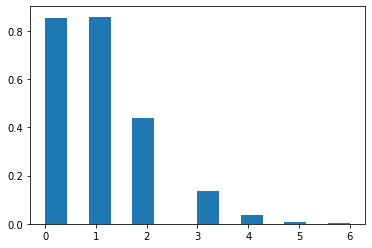

In [18]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()